In [1]:
#import initial dependencies, more to follow
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

DATA CLEANING AND PRE-PROCESSING

In [2]:
# Data loading
file_path = Path("myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [4]:
# Create a new dataframe that drops the MYOPIC feature since it's biased
df_myopia_2 = df_myopia.drop(['MYOPIC'], axis=1)
target = df_myopia['MYOPIC']
df_myopia_2.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
df_myopia_2.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [7]:
for column in df_myopia_2.columns:
    print(f"Column {column} has {df_myopia_2[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [8]:
print(f"Duplicate entries: {df_myopia_2.duplicated().sum()}")

Duplicate entries: 0


In [31]:
# Scale the data and retain features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia_2)

In [32]:
df_myopia_2.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [15]:
# Create a new df with the transformed data
new_df_myopia = pd.DataFrame(scaled_data, columns=df_myopia_2.columns[1:])
new_df_myopia['DADMY'] = df_myopia_2['DADMY']
new_df_myopia.head()

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0


In [16]:
# Saving cleaned data
file_path = Path("myopia_cleaned_2.csv")
new_df_myopia.to_csv(file_path, index=False)

PART II: PCA- DIMENSIONALITY REDUCTION

In [17]:
# Load the data
file_path_2 = Path("myopia_cleaned_2.csv")
new_df_myopia = pd.read_csv(file_path_2)
new_df_myopia.head()

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,1
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0


In [18]:
# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(new_df_myopia)

In [19]:
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2"]
)
df_myopia_pca.head()

,principal component 1,principal component 2
0,0.505670,1.253243
1,-0.665101,-1.464905
2,-0.901125,-0.830794
3,0.122325,1.131619
4,-0.412369,-2.775979


In [20]:
pca.explained_variance_ratio_

array([0.24191828, 0.17815302])

So far, PC1 explains only 24% of the variance, and PC2 explains 18%, for a total of 42% of the total dataset. If another component is added, it may increase the explained variance... or it might not (as it turned out, it only increased the variance by 1% so I removed it).
I decided to take the hint and instantiate the amount of variance I want to preserve rather than telling the model repeatedly to increase the number of components to increase variance.

In [21]:
# PCA model with n = 3 components
pca = PCA(n_components=0.90)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(new_df_myopia)

In [22]:
pca.explained_variance_ratio_

array([0.24191828, 0.17815302, 0.09628893, 0.08413271, 0.08015689,
       0.07349517, 0.07230436, 0.05955729, 0.04982764])

Dammit. This only explains about 48% of the variance. What fresh Hell is this?

In [23]:
from sklearn.manifold import TSNE

In [24]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=200)

In [25]:
tsne_features = tsne.fit_transform(new_df_myopia)

C:\Users\msfte\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [26]:
tsne_features.shape

(618, 2)

In [27]:
# Prepare to plot the dataset

# The first column of transformed features
new_df_myopia['x'] = tsne_features[:,0]

# The second column of transformed features
new_df_myopia['y'] = tsne_features[:,1]

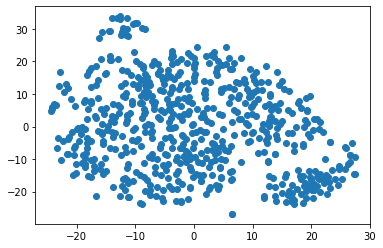

In [28]:
# Visualize the clusters
plt.scatter(new_df_myopia['x'], new_df_myopia['y'])
plt.show()

It doesn't appear that there are any distinct clusters in this data. Argh.

In [29]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

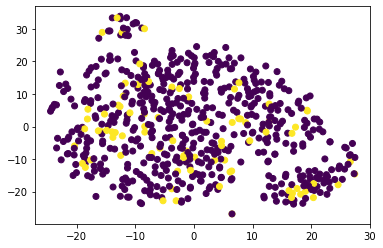

In [30]:
# Visualize the clusters with color
plt.scatter(new_df_myopia['x'], new_df_myopia['y'], c=labels)
plt.show()